In [1]:
import pandas as pd
temporal_data = pd.read_csv("temporal.csv")
temporal_data.head()

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1


In [2]:
temporal_data.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [3]:
temporal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [4]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
#To increase the limit of rows and columns and we can visualize the whole data

In [5]:
format_dict = {'data science': '${0:,.2f}','Mes':'{:%m-%Y}','machine learning':'{:.2%}'}
#we make sure that the month column has datetime format
temporal_data['Mes'] = pd.to_datetime(temporal_data['Mes'])
#we apply the style to the visualization
temporal_data.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [6]:
format_dict = {'Mes':'{:%m-%Y}'}
#simplified format dictionary with values that do make sense for our data
temporal_data.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [7]:
temporal_data.head(10).style.format(format_dict).background_gradient(subset=['data science','machine learning'],cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [8]:
temporal_data.head().style.format(format_dict).bar(color='red',subset=['data science','deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [9]:
temporal_data.head(10).style.format(format_dict).background_gradient(subset=['data science','machine learning'],cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


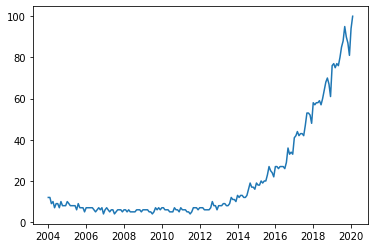

In [10]:
import matplotlib.pyplot as plt
plt.plot(temporal_data['Mes'],temporal_data['data science'],label='data science')
#The parameter label is to indicate the legend.This doesn't mean that it will be shown

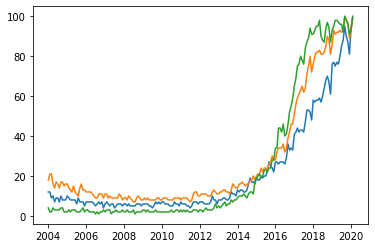

In [11]:
plt.plot(temporal_data['Mes'],temporal_data['data science'],label='data science')
plt.plot(temporal_data['Mes'],temporal_data['machine learning'],label='machine learning')
plt.plot(temporal_data['Mes'],temporal_data['deep learning'],label='deep learning')

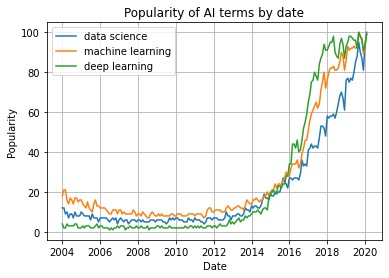

In [12]:
plt.plot(temporal_data['Mes'],temporal_data['data science'],label='data science')
plt.plot(temporal_data['Mes'],temporal_data['machine learning'],label='machine learning')
plt.plot(temporal_data['Mes'],temporal_data['deep learning'],label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

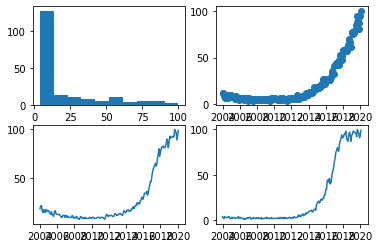

In [13]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(temporal_data['data science'])
axes[0,1].scatter(temporal_data['Mes'],temporal_data['data science'])
axes[1,0].plot(temporal_data['Mes'],temporal_data['machine learning'])
axes[1,1].plot(temporal_data['Mes'],temporal_data['deep learning'])

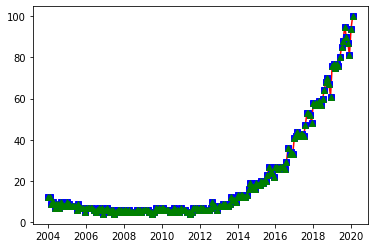

In [14]:
plt.plot(temporal_data['Mes'],temporal_data['data science'],'r-')
plt.plot(temporal_data['Mes'],temporal_data['data science'],'bs')
plt.plot(temporal_data['Mes'],temporal_data['data science'],'g^')

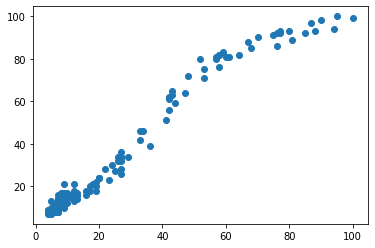

In [15]:
plt.scatter(temporal_data['data science'],temporal_data['machine learning'])

<BarContainer object of 194 artists>

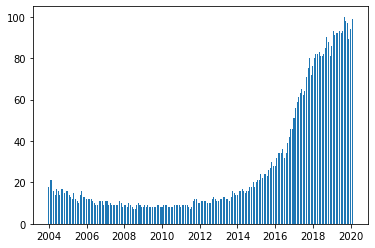

In [16]:
plt.bar(temporal_data['Mes'],temporal_data['machine learning'],width=20)

NameError: ignored

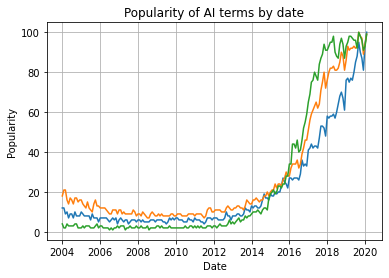

In [20]:
from pandas.core.reshape.tile import to_datetime
plt.plot(temporal_data['Mes'],temporal_data['data science'],label='data science')
plt.plot(temporal_data['Mes'],temporal_data['machine learning'],label='machine learning')
plt.plot(temporal_data['Mes'],temporal_data['deep learning'],label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.text(pd.to_datetime('2010-01-01'),y=80,s=r)
#coordinate use the same units as the graph
plt.annotate('Notice something?',xy=(pd.to_datetime('2014-01-01'),30),
             xytext=(pd.to_datetime('2006-01-01'),50),
             arrowprops={'facecolor':'red','shrink':0.05})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


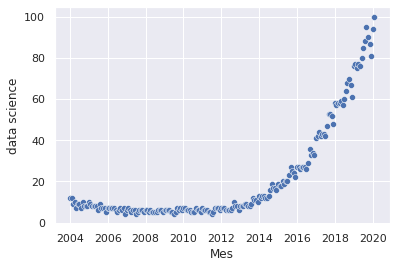

In [17]:
import seaborn as sns
sns.set()
sns.scatterplot(temporal_data['Mes'],temporal_data['data science'])

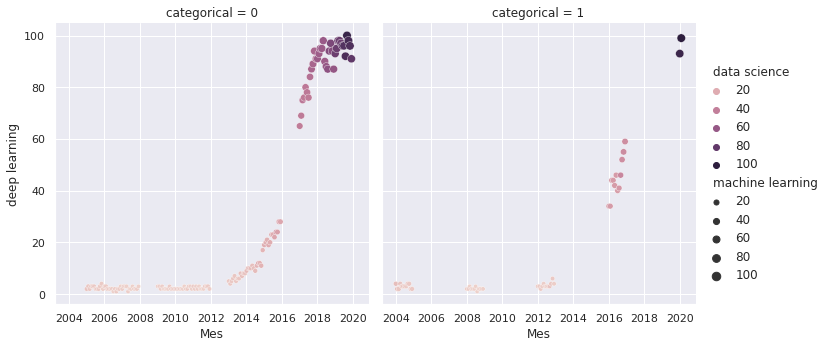

In [18]:
sns.relplot(x='Mes',y='deep learning',hue='data science',size='machine learning',col='categorical',data=temporal_data)

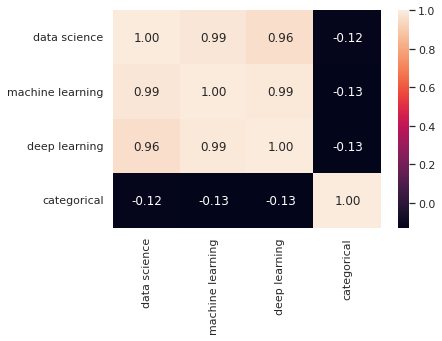

In [19]:
sns.heatmap(temporal_data.corr(),annot = True, fmt='.2f')

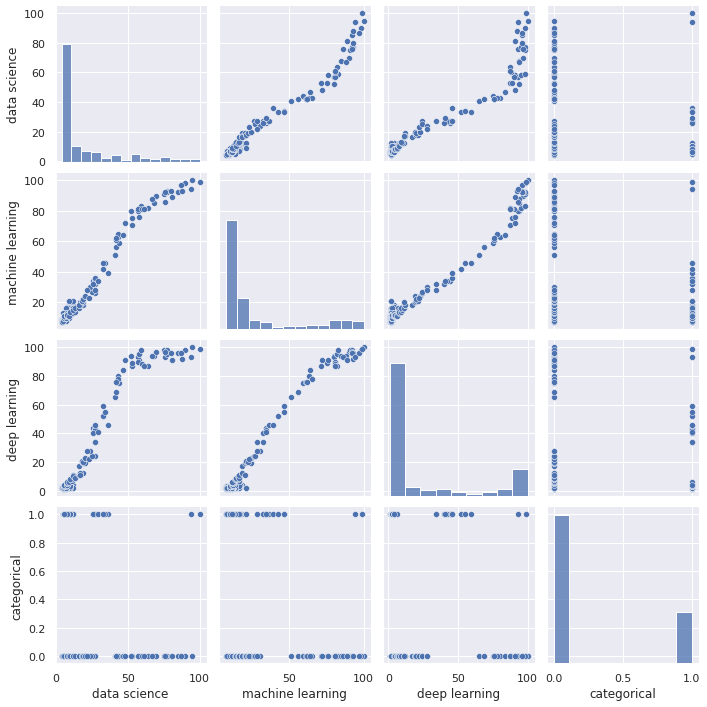

In [20]:
sns.pairplot(temporal_data)

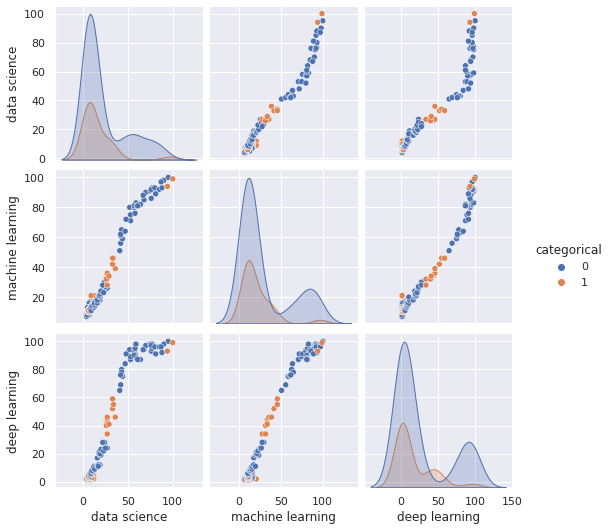

In [21]:
sns.pairplot(temporal_data,hue='categorical')

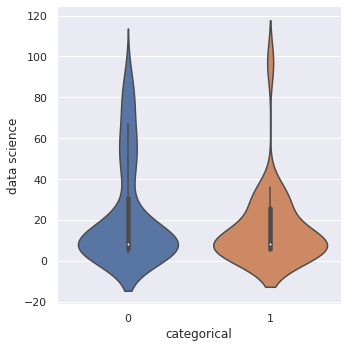

In [22]:
sns.catplot(x='categorical',y='data science',kind='violin',data=temporal_data)

Text(0.5, 1.0, 'Machine learning')

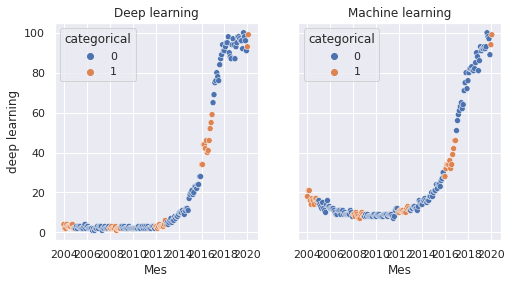

In [23]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(8,4))
sns.scatterplot(x='Mes',y='deep learning',hue='categorical',data=temporal_data,ax=axes[0])
axes[0].set_title('Deep learning')
sns.scatterplot(x='Mes',y='machine learning',hue='categorical',data=temporal_data,ax=axes[1])
axes[1].set_title('Machine learning')

In [24]:
import folium
m1 = folium.Map(location=[41.38,2.17], tiles='openstreetmap',zoom_start=18)
m1.save('map1.html')

In [25]:
m2 = folium.Map(location=[41.38,2.17], tiles='openstreetmap',zoom_start=16)
folium.Marker([41.38,2.176], popup='<i>You can use whatever HTML code you want</i>',tooltip='click here').add_to(m2)
folium.Marker([41.38,2.176], popup='<b>You can use whatever HTML code you want</b>',tooltip='dont click here').add_to(m2)
m2.save('map2.html')

In [27]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
     |████████████████████████████████| 16.7 MB 737 kB/s 
     |████████████████████████████████| 6.3 MB 18.9 MB/s 


In [29]:
from geopandas.tools import geocode
map_data = pd.read_csv("mapa.csv")
map_data.dropna(axis=0, inplace=True)
map_data['geometry'] = geocode(map_data['País'], provider='nominatim')['geometry']
map_data['Latitude'] = map_data['geometry'].apply(lambda ʅ:ʅ.y)
map_data['Longitude'] = map_data['geometry'].apply(lambda ʅ:ʅ.x)
map_data.head()

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,País,data science,machine learning,deep learning,geometry,Latitude,Longitude
0,Santa Elena,100.0,100.0,52.0,POINT (-5.71294 -15.96946),-15.969457,-5.712944
1,India,99.0,77.0,25.0,POINT (78.66774 22.35111),22.351115,78.667743
4,Singapur,91.0,79.0,52.0,POINT (103.81950 1.35711),1.357107,103.819499
8,Nigeria,72.0,25.0,8.0,POINT (7.99997 9.60004),9.600036,7.999972
12,Pakistán,56.0,38.0,17.0,POINT (71.24750 30.33084),30.330840,71.247499


In [30]:
m3 = folium.Map(location=[39.326234,-4.838065], tiles='openstreetmap',zoom_start=3)
def color_producer(val):
  if val<=50:
    return 'red'
  else:
    return 'green'
for i in range(0,len(map_data)):
  folium.Circle(location=[map_data.iloc[i]['Latitude'],map_data.iloc[i]['Longitude']],
radius=5000*map_data.iloc[i]['data science'],color=color_producer(map_data.iloc[i]['data science'])).add_to(m3)
m3.save('map3.html')

In [33]:
import pwd